# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Maulana Malik Ibrahim
- **Email:** abhiemsmile@gmail.com
- **ID Dicoding:** maulanamalikibrahim

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana Tren Air Quality Index (AQI) di beberapa kota 
- Pertanyaan 2: Bagaimana pengaruh suhu, kelembapan, dan kecepatan angin terhadap tingkat polusi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
aotizhongxin_df = pd.read_csv("dataset/PRSA_Data_Aotizhongxin_20130301-20170228.csv") # Memuat data air quality Aotizhongxin
changping_df = pd.read_csv("dataset/PRSA_Data_Changping_20130301-20170228.csv") # Memuat data air quality Changping
dingling_df = pd.read_csv("dataset/PRSA_Data_Dingling_20130301-20170228.csv") # Memuat data air quality Dingling

aotizhongxin_df.head(), changping_df.head(), dingling_df.head() # Menampilkan 5 baris data pertama tiap-tiap dataframe

(   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
 1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
 2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
 3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
 4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   
 
      PRES  DEWP  RAIN   wd  WSPM       station  
 0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
 1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
 2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
 3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
 4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  ,
    No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
 1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.

**Insight:**
- Ketiga dataframe tersebut memiliki struktur yang sama

### Assessing Data

In [3]:
# Menilai dataframe Aotizhongxin
aotizhongxin_df.info(), aotizhongxin_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


(None,
 No            0
 year          0
 month         0
 day           0
 hour          0
 PM2.5       925
 PM10        718
 SO2         935
 NO2        1023
 CO         1776
 O3         1719
 TEMP         20
 PRES         20
 DEWP         20
 RAIN         20
 wd           81
 WSPM         14
 station       0
 dtype: int64)

In [4]:
# Menilai dataframe changping
changping_df.info(), changping_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


(None,
 No            0
 year          0
 month         0
 day           0
 hour          0
 PM2.5       774
 PM10        582
 SO2         628
 NO2         667
 CO         1521
 O3          604
 TEMP         53
 PRES         50
 DEWP         53
 RAIN         51
 wd          140
 WSPM         43
 station       0
 dtype: int64)

In [5]:
# Menilai dataframe dingling
dingling_df.info(), dingling_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


(None,
 No            0
 year          0
 month         0
 day           0
 hour          0
 PM2.5       779
 PM10        656
 SO2         730
 NO2        1234
 CO         2012
 O3         1214
 TEMP         53
 PRES         50
 DEWP         53
 RAIN         51
 wd          140
 WSPM         43
 station       0
 dtype: int64)

In [6]:
# Cek duplikasi pada masing masing dataframe

# Cek duplikasi pada dataframe Aotizhongxin
print("Jumlah duplikasi data pada dataframe Aotizhongxin: ", aotizhongxin_df.duplicated().sum())

# Cek duplikasi pada dataframe Changping
print("Jumlah duplikasi data pada dataframe Changping: ", changping_df.duplicated().sum())

# Cek duplikasi pada dataframe Dingling
print("Jumlah duplikasi data pada dataframe Dingling: ", dingling_df.duplicated().sum())

Jumlah duplikasi data pada dataframe Aotizhongxin:  0
Jumlah duplikasi data pada dataframe Changping:  0
Jumlah duplikasi data pada dataframe Dingling:  0


In [7]:
# Describe masing masing dataframe

# Dataframe aotizhongxin
aotizhongxin_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,34983,35050.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5140,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,NaN,1.708496,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,NaN,1.204071,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


In [8]:
# Dataframe changping
changping_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,34924,35021.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Changping
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4776,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,NaN,1.853836,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,NaN,1.309808,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN


In [9]:
# Dataframe aotizhongxin
dingling_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,34924,35021.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Dingling
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4776,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,NaN,1.853836,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,NaN,1.309808,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN


**Insight:**
- Pada masing-masing dataframe terdapat beberapa kolom data yang memiliki missing value
- Kolom yang memiliki missing value adalah kolom yang sama
- Tidak ada duplikasi data pada ketiga dataframe tersebut

### Cleaning Data

In [10]:
# Cleansing untuk dataframe aotizhongxin

aotizhongxin_df["datetime"] = pd.to_datetime(aotizhongxin_df[["year", "month", "day", "hour"]]) # Untuk menggabungkan kolom tersebut menjadi satu kolom datetime
aotizhongxin_df.drop(columns=["year", "month", "day", "hour"], inplace=True) # Untuk menghapus kolom yang sudah digabungkan 

In [11]:
num_cols = aotizhongxin_df.select_dtypes(include=["float64"]).columns
aotizhongxin_df[num_cols] = aotizhongxin_df[num_cols].apply(lambda x: x.fillna(x.median())) # Untuk mengisi misssing value dengan median dari kolom tersebut

In [12]:
# Cleansing kolom wind direction (wd) pada aotizhongxin dataframe
aotizhongxin_df["wd"].fillna(aotizhongxin_df["wd"].mode()[0], inplace=True) # Mengisi missing value pada kolom wd dengan nilai modus

C:\Users\Tole\AppData\Local\Temp\ipykernel_8272\3704916482.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aotizhongxin_df["wd"].fillna(aotizhongxin_df["wd"].mode()[0], inplace=True) # Mengisi missing value pada kolom wd dengan nilai modus


In [13]:
# Crosscheck kembali hasil cleansing aotizhongxing dataframe
aotizhongxin_df.info(), aotizhongxin_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        35064 non-null  int64         
 1   PM2.5     35064 non-null  float64       
 2   PM10      35064 non-null  float64       
 3   SO2       35064 non-null  float64       
 4   NO2       35064 non-null  float64       
 5   CO        35064 non-null  float64       
 6   O3        35064 non-null  float64       
 7   TEMP      35064 non-null  float64       
 8   PRES      35064 non-null  float64       
 9   DEWP      35064 non-null  float64       
 10  RAIN      35064 non-null  float64       
 11  wd        35064 non-null  object        
 12  WSPM      35064 non-null  float64       
 13  station   35064 non-null  object        
 14  datetime  35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int64(1), object(2)
memory usage: 4.0+ MB


(None,
                  No         PM2.5          PM10           SO2           NO2  \
 count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
 mean   17532.500000     82.120075    109.588187     17.152554     59.121859   
 min        1.000000      3.000000      2.000000      0.285600      2.000000   
 25%     8766.750000     23.000000     39.000000      3.000000     31.000000   
 50%    17532.500000     58.000000     87.000000      9.000000     53.000000   
 75%    26298.250000    112.000000    153.000000     21.000000     81.000000   
 max    35064.000000    898.000000    984.000000    341.000000    290.000000   
 std    10122.249256     81.142233     94.299574     22.557057     36.586135   
 
                  CO            O3          TEMP          PRES          DEWP  \
 count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
 mean    1244.561887     55.649690     13.585130   1011.846665      3.123449   
 min      100.000000      0.214

In [14]:
# Cleansing dataframe Changping

changping_df["datetime"] = pd.to_datetime(changping_df[["year", "month", "day", "hour"]]) # Untuk menggabungkan kolom tersebut menjadi satu kolom datetime
changping_df.drop(columns=["year", "month", "day", "hour"], inplace=True) # Untuk menghapus kolom yang sudah digabungkan 

In [15]:
num_cols = changping_df.select_dtypes(include=["float64"]).columns
changping_df[num_cols] = changping_df[num_cols].apply(lambda x: x.fillna(x.median())) # Untuk mengisi misssing value dengan median dari kolom tersebut

In [16]:
# Cleansing kolom wind direction (wd) pada aotizhongxin dataframe
changping_df["wd"].fillna(changping_df["wd"].mode()[0], inplace=True) # Mengisi missing value pada kolom wd dengan nilai modus

C:\Users\Tole\AppData\Local\Temp\ipykernel_8272\1046224678.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  changping_df["wd"].fillna(changping_df["wd"].mode()[0], inplace=True) # Mengisi missing value pada kolom wd dengan nilai modus


In [17]:
# Crosscheck kembali hasil cleansing Changping dataframe
changping_df.info(), changping_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        35064 non-null  int64         
 1   PM2.5     35064 non-null  float64       
 2   PM10      35064 non-null  float64       
 3   SO2       35064 non-null  float64       
 4   NO2       35064 non-null  float64       
 5   CO        35064 non-null  float64       
 6   O3        35064 non-null  float64       
 7   TEMP      35064 non-null  float64       
 8   PRES      35064 non-null  float64       
 9   DEWP      35064 non-null  float64       
 10  RAIN      35064 non-null  float64       
 11  wd        35064 non-null  object        
 12  WSPM      35064 non-null  float64       
 13  station   35064 non-null  object        
 14  datetime  35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int64(1), object(2)
memory usage: 4.0+ MB


(None,
                  No         PM2.5         PM10           SO2           NO2  \
 count  35064.000000  35064.000000  35064.00000  35064.000000  35064.000000   
 mean   17532.500000     70.545694     94.28179     14.816361     44.026443   
 min        1.000000      2.000000      2.00000      0.285600      1.847700   
 25%     8766.750000     18.000000     34.00000      2.000000     22.000000   
 50%    17532.500000     46.000000     72.00000      7.000000     36.000000   
 75%    26298.250000     98.000000    129.00000     18.000000     60.000000   
 max    35064.000000    882.000000    999.00000    310.000000    226.000000   
 std    10122.249256     71.619188     82.79695     20.813426     29.259029   
 
                  CO            O3          TEMP          PRES          DEWP  \
 count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
 mean    1137.019279     57.734328     13.687644   1007.759764      1.505941   
 min      100.000000      0.214200    -1

In [18]:
# Cleansing dataframe Dingling

dingling_df["datetime"] = pd.to_datetime(dingling_df[["year", "month", "day", "hour"]]) # Untuk menggabungkan kolom tersebut menjadi satu kolom datetime
dingling_df.drop(columns=["year", "month", "day", "hour"], inplace=True) # Untuk menghapus kolom yang sudah digabungkan 

In [19]:
num_cols = dingling_df.select_dtypes(include=["float64"]).columns
dingling_df[num_cols] = dingling_df[num_cols].apply(lambda x: x.fillna(x.median())) # Untuk mengisi misssing value dengan median dari kolom tersebut

In [20]:
# Cleansing kolom wind direction (wd) pada aotizhongxin dataframe
dingling_df["wd"].fillna(dingling_df["wd"].mode()[0], inplace=True) # Mengisi missing value pada kolom wd dengan nilai modus

C:\Users\Tole\AppData\Local\Temp\ipykernel_8272\431727297.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dingling_df["wd"].fillna(dingling_df["wd"].mode()[0], inplace=True) # Mengisi missing value pada kolom wd dengan nilai modus


In [21]:
# Crosscheck kembali hasil cleansing Dingling dataframe
dingling_df.info(), dingling_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        35064 non-null  int64         
 1   PM2.5     35064 non-null  float64       
 2   PM10      35064 non-null  float64       
 3   SO2       35064 non-null  float64       
 4   NO2       35064 non-null  float64       
 5   CO        35064 non-null  float64       
 6   O3        35064 non-null  float64       
 7   TEMP      35064 non-null  float64       
 8   PRES      35064 non-null  float64       
 9   DEWP      35064 non-null  float64       
 10  RAIN      35064 non-null  float64       
 11  wd        35064 non-null  object        
 12  WSPM      35064 non-null  float64       
 13  station   35064 non-null  object        
 14  datetime  35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int64(1), object(2)
memory usage: 4.0+ MB


(None,
                  No         PM2.5          PM10           SO2           NO2  \
 count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
 mean   17532.500000     65.434317     83.295585     11.609128     27.283320   
 min        1.000000      3.000000      2.000000      0.285600      1.026500   
 25%     8766.750000     14.000000     26.000000      2.000000      9.000000   
 50%    17532.500000     41.000000     60.000000      5.000000     19.000000   
 75%    26298.250000     91.000000    116.000000     14.000000     37.000000   
 max    35064.000000    881.000000    905.000000    156.000000    205.000000   
 std    10122.249256     71.555278     78.859721     15.387066     25.963693   
 
                  CO            O3          TEMP          PRES          DEWP  \
 count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
 mean     887.400896     68.287028     13.687644   1007.759764      1.505941   
 min      100.000000      0.214

In [22]:
# Crosscheck kembali untuk melihat apakah ada duplikasi pada masing masing dataframe

# Cek duplikasi pada dataframe Aotizhongxin
print("Jumlah duplikasi data pada dataframe Aotizhongxin: ", aotizhongxin_df.duplicated().sum())

# Cek duplikasi pada dataframe Changping
print("Jumlah duplikasi data pada dataframe Changping: ", changping_df.duplicated().sum())

# Cek duplikasi pada dataframe Dingling
print("Jumlah duplikasi data pada dataframe Dingling: ", dingling_df.duplicated().sum())

Jumlah duplikasi data pada dataframe Aotizhongxin:  0
Jumlah duplikasi data pada dataframe Changping:  0
Jumlah duplikasi data pada dataframe Dingling:  0


**Insight:**
- Dari ketiga dataframe tersebut, ketiganya memiliki missing value pada kolom yang sama yakni kolom kolom polutan udara dan wind direction
- Ketiga dataframe tersebut tidak ditemukan duplikasi data 

## Exploratory Data Analysis (EDA)

### Explore ...

In [23]:
# Menggabungkan ketiga dataframe 
all_df = pd.concat([aotizhongxin_df, changping_df, dingling_df], axis=0, ignore_index=True)

In [24]:
# Melihat hasil penggabungan dari ketiga dataframe tersebut

all_df.head(), all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105192 entries, 0 to 105191
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        105192 non-null  int64         
 1   PM2.5     105192 non-null  float64       
 2   PM10      105192 non-null  float64       
 3   SO2       105192 non-null  float64       
 4   NO2       105192 non-null  float64       
 5   CO        105192 non-null  float64       
 6   O3        105192 non-null  float64       
 7   TEMP      105192 non-null  float64       
 8   PRES      105192 non-null  float64       
 9   DEWP      105192 non-null  float64       
 10  RAIN      105192 non-null  float64       
 11  wd        105192 non-null  object        
 12  WSPM      105192 non-null  float64       
 13  station   105192 non-null  object        
 14  datetime  105192 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int64(1), object(2)
memory usage: 12.0+ MB


(   No  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  RAIN   wd  \
 0   1    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0 -18.8   0.0  NNW   
 1   2    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2 -18.2   0.0    N   
 2   3    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5 -18.2   0.0  NNW   
 3   4    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5 -19.4   0.0   NW   
 4   5    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2 -19.5   0.0    N   
 
    WSPM       station            datetime  
 0   4.4  Aotizhongxin 2013-03-01 00:00:00  
 1   4.7  Aotizhongxin 2013-03-01 01:00:00  
 2   5.6  Aotizhongxin 2013-03-01 02:00:00  
 3   3.1  Aotizhongxin 2013-03-01 03:00:00  
 4   2.0  Aotizhongxin 2013-03-01 04:00:00  ,
 None)

In [25]:
all_df.groupby(by="station").agg({
    "PM2.5": ["max", "min", "mean", "std"],
    "PM10": ["max", "min", "mean", "std"],
    'SO2': ["max", "min", "mean", "std"], 
    'NO2': ["max", "min", "mean", "std"], 
    'CO': ["max", "min", "mean", "std"], 
    'O3': ["max", "min", "mean", "std"]
}) # Melihat distribusi data polutan pada masing masing station

PM2.5                              PM10                   \
                max  min       mean        std    max  min        mean   
station                                                                  
Aotizhongxin  898.0  3.0  82.120075  81.142233  984.0  2.0  109.588187   
Changping     882.0  2.0  70.545694  71.619188  999.0  2.0   94.281790   
Dingling      881.0  3.0  65.434317  71.555278  905.0  2.0   83.295585   

                           SO2          ...        NO2                  CO  \
                    std    max     min  ...       mean        std      max   
station                                 ...                                  
Aotizhongxin  94.299574  341.0  0.2856  ...  59.121859  36.586135  10000.0   
Changping     82.796950  310.0  0.2856  ...  44.026443  29.259029  10000.0   
Dingling      78.859721  156.0  0.2856  ...  27.283320  25.963693  10000.0   

                                                  O3                     \
                min         mean          std    max     min       mean   
station                                                                   
Aotizhongxin  100.0  1244.561887  1192.758674  423.0  0.2142  55.649690   
Changping     100.0  1137.019279  1081.250627  429.0  0.2142  57.734328   
Dingling      100.0   887.400896   879.868464  500.0  0.2142  68.287028   

                         
                    std  
station                  
Aotizhongxin  56.563751  
Changping     53.869215  
Dingling      52.843495  

[3 rows x 24 columns]

In [26]:
all_df.groupby(by="station").agg({
    "RAIN": ["max", "min", "mean", "std"],
}) # Melihat Distribusi data rain pada masing-masing station

RAIN                         
               max  min      mean       std
station                                    
Aotizhongxin  72.5  0.0  0.067383  0.909798
Changping     52.1  0.0  0.060278  0.752355
Dingling      52.1  0.0  0.060278  0.752355

**Insight:**
- Dikarenakan ketiga dataframe yang saya gunakan memiliki struktur kolom yang sama, saya menggabungkan ketiga dataframe tersebut menjadi satu dataframe

## Visualization & Explanatory Analysis

### Pertanyaan 1 (Bagaimana Tren Air Quality Index (AQI)):

In [30]:
# Menentukan Tren air quality berdasarkan tingkat polutan

# Mencari nilai rata-rata dari semua polutan tiap tahun di masing-masing station
pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
annual_pollutants = all_df.groupby([all_df["datetime"].dt.year, 'station'])[pollutants].mean().reset_index()

annual_pollutants.set_index("datetime", inplace=True)
annual_pollutants.head()

,station,PM2.5,PM10,SO2,NO2,CO,O3
datetime,,,,,,,
2013,Aotizhongxin,82.355937,112.897467,23.377838,63.348157,1144.828159,49.117162
2013,Changping,72.524782,91.226307,19.159950,41.136710,1007.726580,61.277259
2013,Dingling,64.321487,78.274918,13.856668,29.255656,796.190768,64.927894
2014,Aotizhongxin,88.905422,120.107911,20.549600,63.300103,1170.308219,48.963619
2014,Changping,78.339075,105.821861,20.760274,45.326906,1185.376712,62.768664


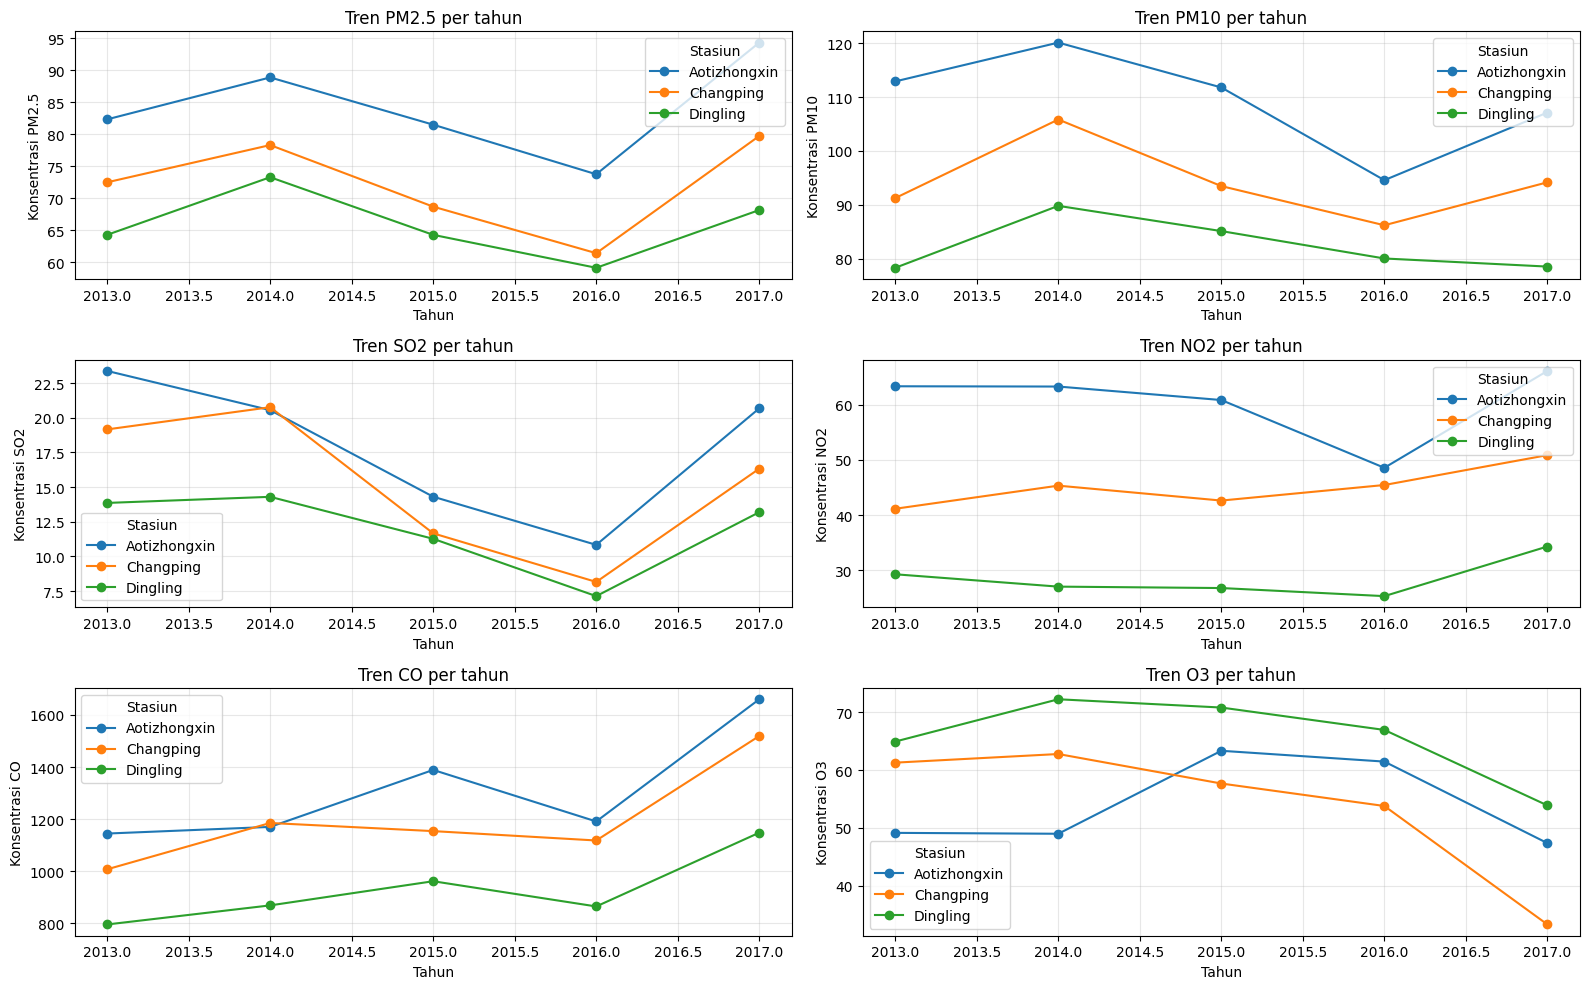

,station,PM2.5,PM10,SO2,NO2,CO,O3
datetime,,,,,,,
2013,Aotizhongxin,82.355937,112.897467,23.377838,63.348157,1144.828159,49.117162
2013,Changping,72.524782,91.226307,19.159950,41.136710,1007.726580,61.277259
2013,Dingling,64.321487,78.274918,13.856668,29.255656,796.190768,64.927894
2014,Aotizhongxin,88.905422,120.107911,20.549600,63.300103,1170.308219,48.963619
2014,Changping,78.339075,105.821861,20.760274,45.326906,1185.376712,62.768664


In [31]:
# Membuat visualisasi data berdasarkan dataframe annual pollutants

plt.figure(figsize=(16, 10))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    for station in annual_pollutants['station'].unique():
        subset = annual_pollutants[annual_pollutants['station'] == station]
        plt.plot(subset.index, subset[pollutant], marker='o', label=station)

    plt.title(f'Tren {pollutant} per tahun')
    plt.xlabel("Tahun")
    plt.ylabel(f"Konsentrasi {pollutant}")
    plt.grid(alpha=0.3)
    plt.legend(title='Stasiun')

plt.tight_layout()
plt.show()

annual_pollutants.head() # Menampilkan beberapa contoh data untuk analisis

### Pertanyaan 2 (Bagaimana pengaruh parameter cuaca terhadap tingkat polusi?):

In [32]:
# Menghitung korelasi antar polutan dengan parameter cuaca
correlation = all_df[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]].corr()

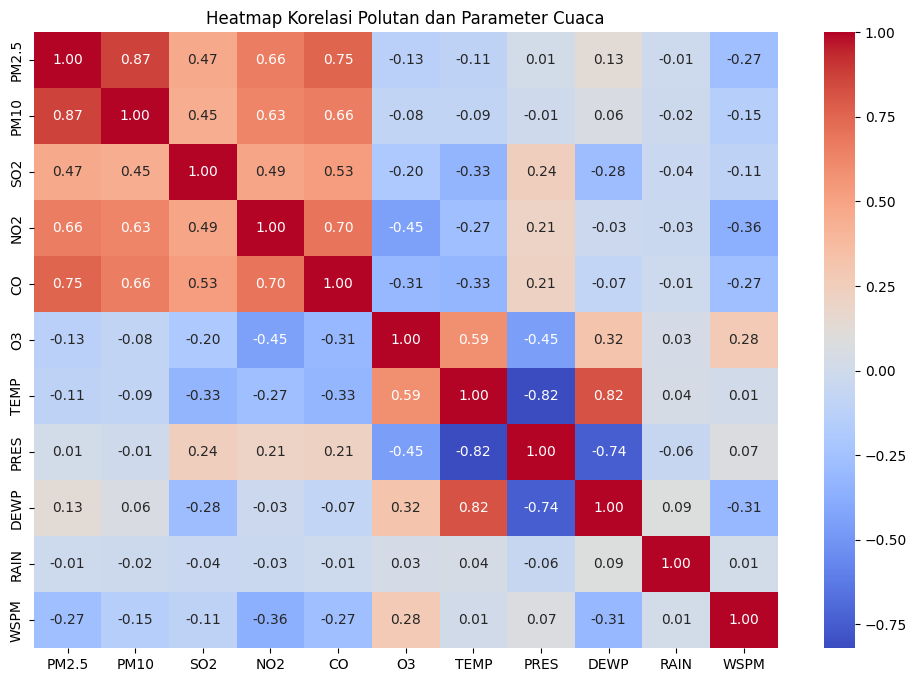

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.866644,0.470188,0.660792,0.753788,-0.127481,-0.109003,0.013521,0.126514,-0.010290,-0.268102
PM10,0.866644,1.000000,0.451642,0.634755,0.663125,-0.083936,-0.085613,-0.008233,0.059861,-0.023486,-0.151924
SO2,0.470188,0.451642,1.000000,0.491054,0.529626,-0.195562,-0.330038,0.240319,-0.281129,-0.038840,-0.105235
NO2,0.660792,0.634755,0.491054,1.000000,0.699852,-0.446622,-0.270914,0.206429,-0.026872,-0.034139,-0.360479
CO,0.753788,0.663125,0.529626,0.699852,1.000000,-0.312713,-0.326110,0.211456,-0.074048,-0.011117,-0.269994
O3,-0.127481,-0.083936,-0.195562,-0.446622,-0.312713,1.000000,0.589042,-0.451994,0.319572,0.027287,0.276382
TEMP,-0.109003,-0.085613,-0.330038,-0.270914,-0.326110,0.589042,1.000000,-0.820643,0.821971,0.035542,0.010480
PRES,0.013521,-0.008233,0.240319,0.206429,0.211456,-0.451994,-0.820643,1.000000,-0.744637,-0.057402,0.070205
DEWP,0.126514,0.059861,-0.281129,-0.026872,-0.074048,0.319572,0.821971,-0.744637,1.000000,0.086460,-0.312759
RAIN,-0.010290,-0.023486,-0.038840,-0.034139,-0.011117,0.027287,0.035542,-0.057402,0.086460,1.000000,0.012490


In [33]:
# Buat heatmap untuk visualisasi korelasi

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap="coolwarm")
plt.title("Heatmap Korelasi Polutan dan Parameter Cuaca")
plt.show()

# Menampilkan korelasi
correlation

**Insight:**
- Pada pertanyaan pertama saya menggunakan line chart untuk mendapatkan visualisasi persebaran/distribusi data polutan dari ketiga dataset
- Pada pertanyaan kedua saya menggunakan heatmap untuk mendapatkan insight baru dari korelasi polutan dengan parameter cuaca 

## Analisis Lanjutan (Opsional)

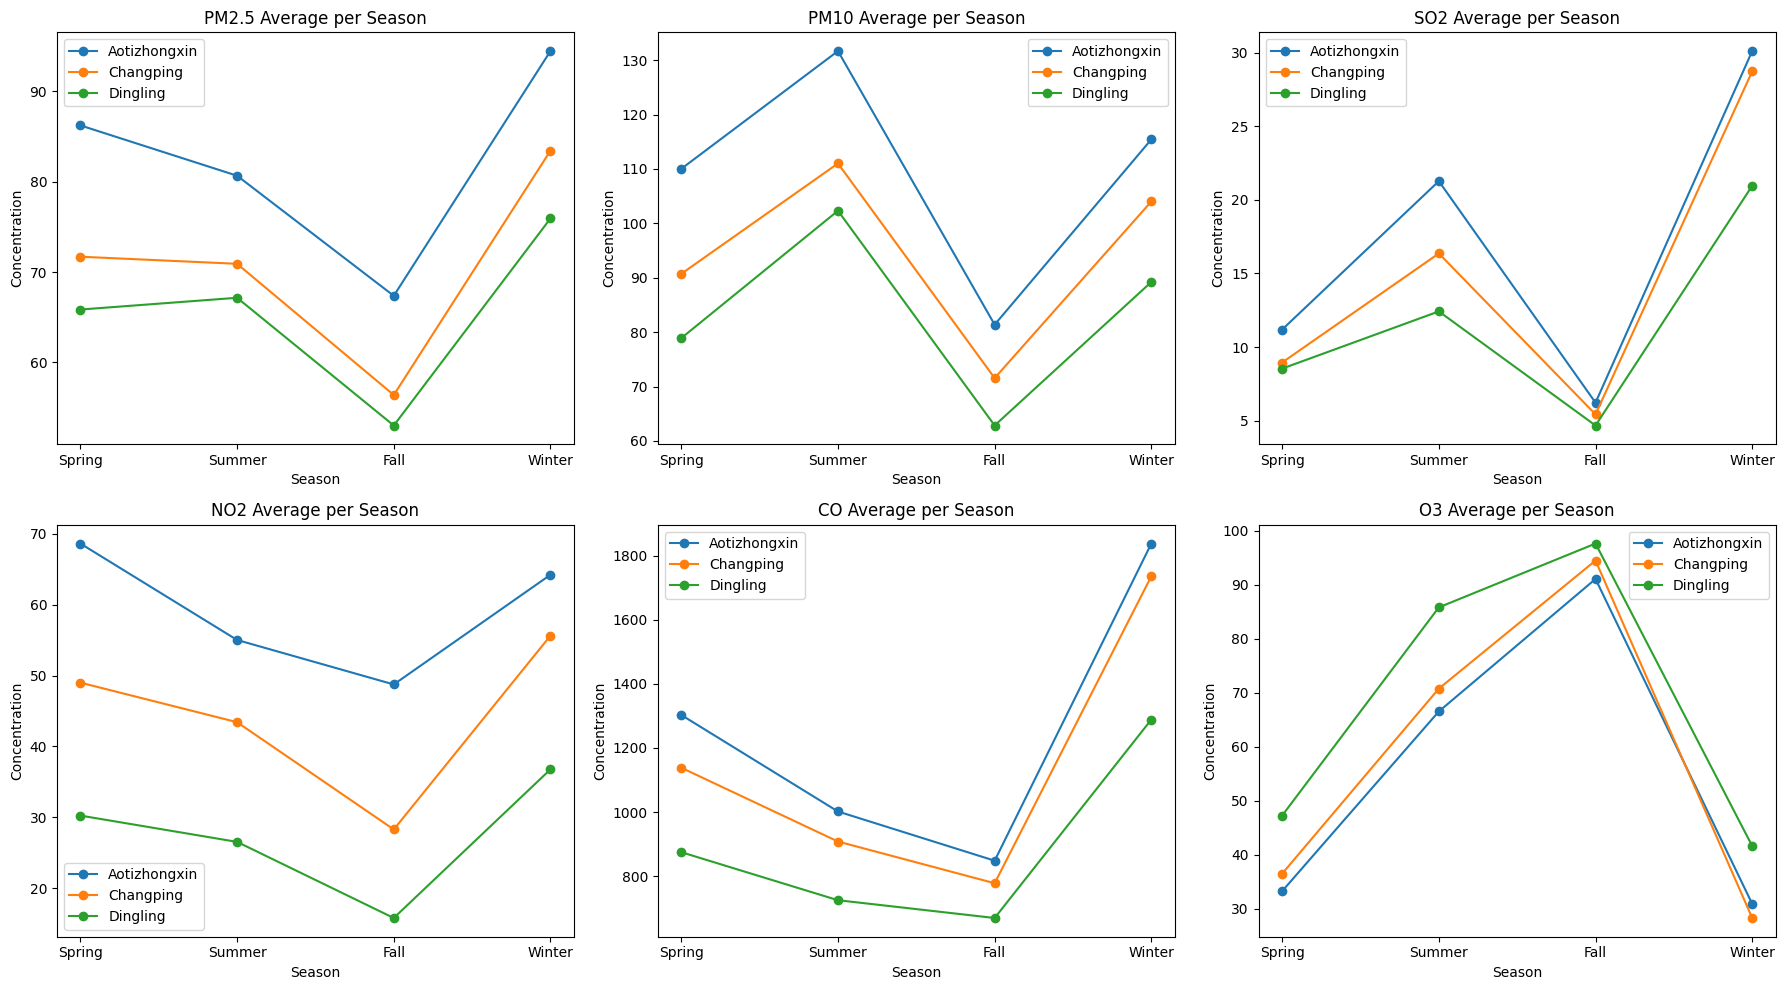

,station,season,PM2.5,PM10,SO2,NO2,CO,O3
0,Aotizhongxin,Fall,86.242434,110.012603,11.186896,68.649006,1302.781136,33.295179
1,Aotizhongxin,Spring,80.669984,131.663655,21.272726,55.038116,1001.620358,66.563169
2,Aotizhongxin,Summer,67.370131,81.369010,6.217679,48.758562,848.065104,91.090594
3,Aotizhongxin,Winter,94.477620,115.423084,30.114631,64.242716,1837.696214,30.936752
4,Changping,Fall,71.698878,90.708047,8.947803,49.013340,1138.174794,36.529762


In [36]:
# Download all dataframe 
all_df.to_csv("all_data.csv", index=False)

# Menggunakan teknik binning untuk mendapatkan air quality index tiap musim
binning_df = all_df.copy()
binning_df["month"] = binning_df["datetime"].dt.month

def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Tambah kolom season pada dataframe
binning_df["season"] = binning_df["month"].apply(get_season)

# Mengelompokkan data berdasarkan season dan station
seasonal_avg = binning_df.groupby(['station', 'season'])[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean().reset_index()

# Membuat visualisasi rata-rata polutan per musim untuk tiap kota
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
seasons = ['Spring', 'Summer', 'Fall', 'Winter']

for i, pollutant in enumerate(pollutants):
    ax = axes[i // 3, i % 3]
    for station in binning_df['station'].unique():
        data = seasonal_avg[seasonal_avg['station'] == station]
        ax.plot(seasons, data[pollutant], marker='o', label=station)
    ax.set_title(f'{pollutant} Average per Season')
    ax.set_xlabel('Season')
    ax.set_ylabel('Concentration')
    ax.legend()

plt.tight_layout()
plt.show()

# Menampilkan beberapa baris hasil binning sebagai contoh
seasonal_avg.head()

## Conclusion

- Conclution pertanyaan 1: Dari visualisasi data tersebut dapat disimpulkan bahwa Kota Aotizhongxin adalah kota dengan polusi terbanyak dibandingkan dua kota lainnya. Hal itu bisa dipertanggungjawabkan karena 5 dari 6 line chart yang ditampilkan Kota Aotizhongxin berada di atas kota-kota lainnya. Sedangkan Kota Dingling adalah kota dengan polutan paling minim dikarenakan pada line chart tersebut hanya pada chart O3 saja yang berada di puncak
- Conclution pertanyaan 2: Berdasarkan heatmap korelasi polutan dengan parameter cuaca didapatkan beberapa hasil korelasi contohnya beberapa polutan seperti PM2.5, PM10, CO, NO2 memiliki keterkaitan satu sama lain yang kuat dikarenakan hasil dari heatmap tersebut memiliki hasil yang cukup kuat. Lalu terdapat juga hasil korelasi Kecepatan Angin (WSPM) dengan PM2.5(-0.27) dan NO2(-0.36) memiliki korelasi negatif yang berarti angin dapat membantu menyebarkan polutan di udara